### Time Series Delay Embedding for Phase Portraits Using Mutual Information
- example using Lorenz attractor - code for attractor from https://matplotlib.org/3.1.0/gallery/mplot3d/lorenz_attractor.html

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mutual_info_score
%matplotlib inline

In [29]:
def lorenz(x, y, z, s=10, r=28, b=2.667):
    '''
    Given:
       x, y, z: a point of interest in three dimensional space
       s, r, b: parameters defining the lorenz attractor
    Returns:
       x_dot, y_dot, z_dot: values of the lorenz attractor's partial
           derivatives at the point x, y, z
    '''
    x_dot = s*(y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    return x_dot, y_dot, z_dot

In [30]:
dt = 0.01
num_steps = 10000

# Need one more for the initial values
xs = np.empty(num_steps + 1)
ys = np.empty(num_steps + 1)
zs = np.empty(num_steps + 1)

# Set initial values
xs[0], ys[0], zs[0] = (0., 1., 1.05)

# Step through "time", calculating the partial derivatives at the current point
# and using them to estimate the next point
for i in range(num_steps):
    x_dot, y_dot, z_dot = lorenz(xs[i], ys[i], zs[i])
    xs[i + 1] = xs[i] + (x_dot * dt)
    ys[i + 1] = ys[i] + (y_dot * dt)
    zs[i + 1] = zs[i] + (z_dot * dt)

Text(0.5,1,'X Dimension Lorenz Attractor')

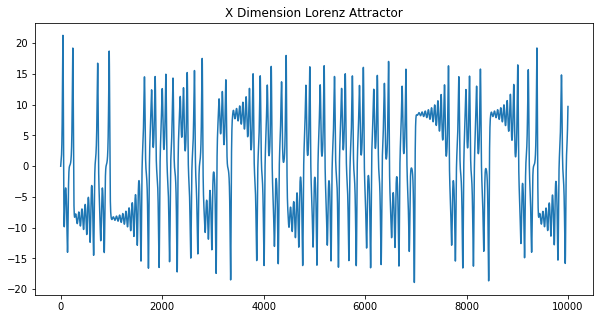

In [195]:
plt.figure(figsize=(10,5))
plt.plot(xs)
plt.title('X Dimension Lorenz Attractor')

In [136]:
# calculate mutual information for different delay embeddings
tau_max = 100
mi_list = []
for tau in range(1,tau_max):
    unlagged = xs[:-tau]
    lagged = np.roll(xs,-tau)[:-tau]
    c_xy = np.histogram2d(unlagged, lagged, bins=50)[0]
    mi_list.append(mutual_info_score(None, None, contingency = c_xy))

Text(0.5,1,'Mutual Information versus Embedding Delays')

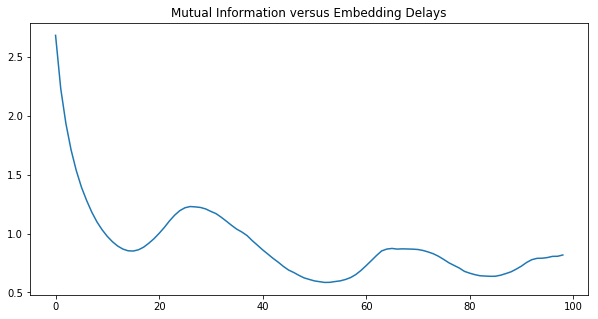

In [194]:
plt.figure(figsize=(10,5))
plt.title('Mutual Information versus Embedding Delays')
plt.plot(mi_list)

In [185]:
# find the first minimum of mutual information
for tau in range(1,tau_max):
    if mi_list[tau] < mi_list[tau+1]:
        tau_min = tau
        print(tau)
        break

15


In [187]:
# use delay embedding of 15
data_lag0 = xs
data_lag1 = np.roll(xs, -tau_min)
data_lag2 = np.roll(xs, -2 * tau_min)

Text(0.5,0,'X Axis')

Text(0.5,0,'Y Axis')

Text(0.5,0,'Z Axis')

Text(0.5,0.92,'Lorenz Attractor from Time Delay Embedding of 15')

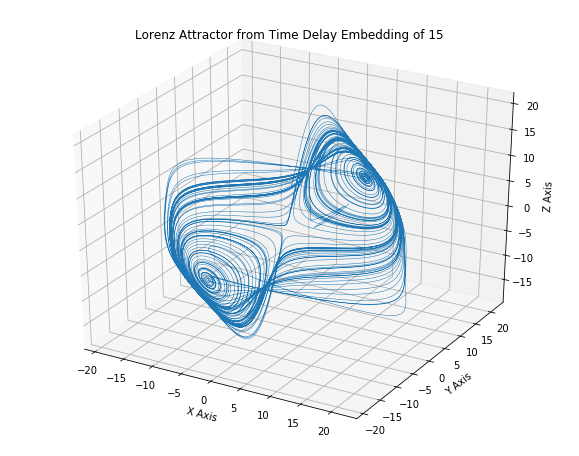

In [198]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(figsize=(10,8))
ax = fig.gca(projection='3d')

ax.plot(data_lag0, data_lag1, data_lag2, lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor from Time Delay Embedding of 15")

plt.show()

In [206]:
# use delay embedding of 5
data_lag0 = xs
data_lag1 = np.roll(xs, -5)
data_lag2 = np.roll(xs, -2 * 5)

Text(0.5,0,'X Axis')

Text(0.5,0,'Y Axis')

Text(0.5,0,'Z Axis')

Text(0.5,0.92,'Lorenz Attractor from Time Delay Embedding of 5')

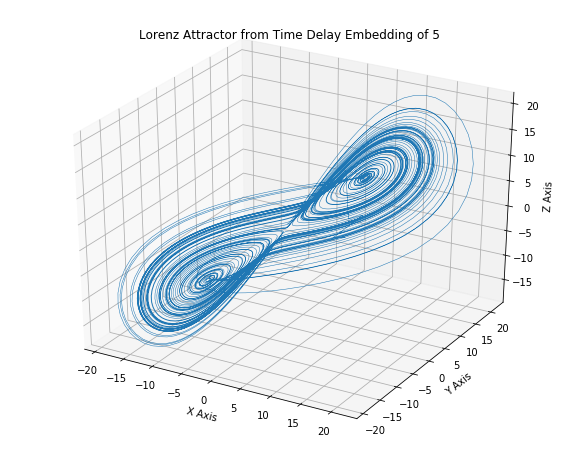

In [207]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(figsize=(10,8))
ax = fig.gca(projection='3d')

ax.plot(data_lag0, data_lag1, data_lag2, lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor from Time Delay Embedding of 5")

plt.show()

- Mutual information method to find the delay embedding seems to not find the optimal embedding
  a delay of 5 produces a phase portrait closer to Lorenz attractor - this embedding is 3 times
  smaller than what the mutual informaton found